In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from cvxopt import matrix, solvers ##quadratic programming problem solver 

## Generate and visualize the data

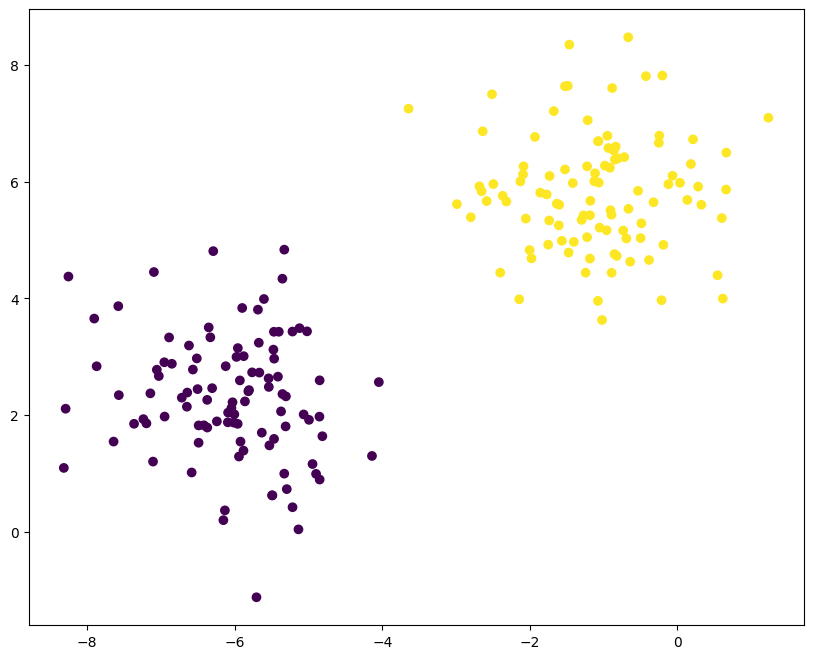

In [7]:
N=200 # number of samples
D=2 # number of dimensions
C=2 # number of classes
seed = 1234

alpha_tol = 1e-4

X, y = make_blobs(n_samples=N, n_features=D, centers=C, random_state=seed)
y[y==0] = -1 # it is more convenient to have -1 and 1 as class labels for the support vector machine (hard-margin, softmargin=perceptron)
y = y.astype(np.float64)
plt.figure(figsize=[10, 8])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Task1: Solving the SVM dual problem

Remember, that the SVM dual problem can be formulated as a Quadratic programming prolem by using (Lagragian) dual function.
Original function is the constrained problem such that,
### The size of margine
$$
\frac{2}{\mathbf{||W||}}
$$

$$
\text{minimize}_{\mathbf{x}}\quad
    \frac{1}{2}\mathbf{W}^T\mathbf{W}
==
\text{maximize}_{\mathbf{x}}\quad
    \frac{2}{\mathbf{||W||}}
$$

### Primary optimization problem
    Hard margine support vector machine
$$
\text{minimize}_{\mathbf{x}}\quad
    \frac{1}{2}\mathbf{W}^T \mathbf{W}
\\
\text{subject to}\quad \xi_i\geq 0 \\
        y_i(\mathbf{W}\mathbf{x_i}+b)-1 \\
        i={0, 1, ,,, , N}
$$

    Lagrange (unconstrained optimization problem)
$$
L(\mathbf{W}, \mathbf{b}, \mathbf{\alpha})= \frac{1}{2}\mathbf{W}^T \mathbf{W} + \sum_{i=1}^{N}\alpha_i [y_i(\mathbf{W}\mathbf{x_i}+b)-1]
\\
\alpha_i \geq 0
$$

    Lagrangian dual function
$$
g(\mathbf{\alpha}) = \text{minimize}_{\mathbf{W, b}} L(\mathbf{W}, \mathbf{b}, \mathbf{\alpha}) \quad
= L(\mathbf{W^*}, \mathbf{b^*}, \mathbf{\alpha})
$$

    Lagrangian dual problem
$$
\text{minimize}_{\mathbf{\alpha}} g(\alpha)
\\
\text{subject to}\quad
\\
W = \sum_{i=1}^{N} y_i x_i \alpha_i
\\
\sum_{i=1}^{N} y_i\alpha_i= 0
\\
\alpha \geq 0
$$

- Only support vectors $$\alpha_i != 0$$contribute to define the binary classifier

### Primary optimization problem
    Soft margine support vector machine
$$
\text{minimize}_{\mathbf{x}}\quad
    \frac{1}{2}\mathbf{W}^T \mathbf{W} + C\sum_{i=1}^{N}[y_i(\mathbf{W}\mathbf{x_i}+b)-1+\xi_i]
\\
\text{subject to}\quad \xi_i\geq 0 \\
        y_i(\mathbf{W}\mathbf{x_i}+b)-1+\xi_i \geq 0
        \\
        i={0, 1, ,,, , N}

$$

### Hinge Loss
$$
\text{Hinge(z)} = \text{max}(0, 1-z) 
$$

    Unconstrained optimization problem (soft margine)
    Hinge Loss Minimization problem

    Optimum
$$
\xi_i \geq 1-[y_i(\mathbf{W}\mathbf{x_i}+b)] 
\\
\mathbf{Z} = y_i(\mathbf{W}\mathbf{x_i}+b)
\\
\xi_i \geq 1-\mathbf{Z}
\\
\text{minimize}_{\mathbf{x}}\quad
    \frac{1}{2}\mathbf{W}^T\mathbf{W} + Hinge(\mathbf{Z})
$$
